# Fast Food Marketing Campaign A\B Test

1. [Introduction](#introduction)  
1.1. [Objectives](#objectives)  
1.2. [Requirements](#requirements)  
1.3. [Dataset](#dataset)  


2. [Data Preparation](#data)  
2.1. [Imports](#imports)  
2.2. [Loading data](#loading_data)  
2.3. [Data cleaning](#data_cleaning)  
2.4. [Feature Engineering](#feature_engineering)  
2.5. [Exploratory Data Analysis (EDA)](#edi)  
2.6. [Preparation of data](#prepare_data)  

3. [A/B Test: Evaluating the Effectiveness of Marketing Campaigns](#ab)  
3.1. [Goal](#goal)  
3.2. [Target Metric](#target)  
3.3. [Check Assumptions for ANOVA](#Check_anova)  
3.4. [Why ANOVA and Tukey's Honestly Significant Difference (HSD) Were Chosen](#why_anova)  
3.5. [Analysis of Variance (ANOVA)](#anova)  
3.6. [Tukey's Honestly Significant Difference (HSD) Test](#hsd)  

4. [Conclusion](#conclusion)  

<a id="introduction"></a>
# 1. Introduction

<a id="objectives"></a>
## 1.1. Objectives

In this project, the goal is to analyze the results of an A/B test conducted by a fast-food chain to evaluate three different marketing campaigns. This will provide an opportunity to practice various data analysis techniques and statistical tests. The specific objectives are:

- **Understand data distribution**: Explore data characteristics.
- **Analyze relationships between features**: Investigate the relationship between variables, such as the link between **MarketSize** and **SalesInThousands**.
- **Evaluate promotion strategies**: Use statistical tests like **ANOVA** and **Tukey’s HSD** to determine significant differences in sales performance across the three promotions.
- **Recommend actionable insights**: Identify the most and least effective promotions based on statistical findings:
  - **Promotion 2** is the least effective and should be avoided.
  - **Promotion 1** is the most effective and a strong candidate for future campaigns.
- **Practice analyzing experiments**: Gain hands-on experience in analyzing experimental data.
- **Practice conducting statistical tests and calculating confidence intervals**: Learn how to apply statistical tests such as ANOVA and Tukey’s HSD, and calculate confidence intervals to assess the reliability of results.
- **Practice communicating results of an A/B test**: Develop the ability to interpret statistical results and present them in a clear and actionable manner.
- **Practice creating dashboards**: Visualize the results using dashboards to effectively communicate findings to stakeholders.

<a id="requirements"></a>
## 1.2. Requirements
Your task is to analyze two datasets — **Fast Food Marketing Campaign A/B Test** and **Cookie Cats A/B Test** datasets. The analysis will be performed in two separate Jupyter notebooks, each following this structure:

1. **Goal**
   - Describe the goal of the A/B test based on the dataset description provided in Kaggle. Provide any necessary context and explain why the test is being conducted.

2. **Target Metric**
- Choose a target metric for evaluation. Describe how the chosen metric measures progress towards the goal of the A/B test. For instance, in the case of the **Fast Food Marketing Campaign A/B Test**, the target metric could be **SalesInThousands**, as the goal is to evaluate the impact of different promotions on sales.

3. **Calculations**
   - **Data Aggregation and Preparation**: Aggregate the data, prepare it for analysis, and report key information about the A/B test, including:
     - Sample size (how many observations were collected).
     - Proportions of each variant used in the test.
   
4. **Conduct Statistical Tests**
   - **Test Selection**: Describe the statistical test chosen for each metric. Justify the choice based on the data type (e.g., normality, number of groups, etc.). Common tests include:
     - **ANOVA** for comparing the means of multiple groups.
     - **T-tests** for comparing the means of two groups.
     - **Levene's Test** to check for variance homogeneity.
     - **Shapiro-Wilk Test** to check for normality.

5. **Report the Estimated Treatment Effect**
   - Report the treatment effect by calculating the difference between group means. For one of the datasets, compute the confidence interval both analytically and using bootstrap methods, and report both intervals.
     - **Confidence Interval**: A range of values that is likely to contain the true population parameter (e.g., mean difference between groups).

6. **Decision**
   - Based on the results of the statistical tests and treatment effect calculations, describe the decision you recommend. Should one of the promotions be chosen over the others? Explain why, based on the statistical results.
   - Use **visualizations** to clearly show the differences in the target metric between groups, along with confidence intervals. Include:
     - **A plot illustrating how the target metric changes over the weeks** for the **Fast Food Marketing Campaign A/B test**.


<a id="dataset"></a>
## 1.3. Dataset: Fast Food Marketing Campaign A/B Test

The dataset for this project can be downloaded from Kaggle:

- **[ Fast Food Marketing Campaign A\B Test](https://www.kaggle.com/datasets/chebotinaa/fast-food-marketing-campaign-ab-test)**

The **Fast Food Marketing Campaign A/B Test** dataset is provided by the Kaggle community. The dataset contains information about a test conducted by a fast-food chain to evaluate three different promotions for a new menu item across various market locations. The promotions were run over four weeks, and sales data for each market location and promotion were recorded.

About the Dataset

A fast-food chain plans to add a new item to its menu, but they are unsure which of three possible marketing campaigns would be most effective in promoting the product. To determine which campaign leads to the highest sales, the company tests each promotion at several randomly selected locations. The sales of the new item are recorded each week for the first four weeks of the test.

#### Columns

- **MarketID**: Unique identifier for each market.
- **MarketSize**: Size of the market area based on sales.
- **LocationID**: Unique identifier for each store location.
- **AgeOfStore**: The age of the store in years.
- **Promotion**: One of three different marketing promotions (coded as 1, 2, or 3).
- **Week**: The week during which the promotion was run (from week 1 to week 4).
- **SalesInThousands**: The sales amount in thousands of dollars for each store, promotion, and week.

<a id="data"></a>
# 2. Data Preparation

<a id="imports"></a>
## 2.1. Imports

In [1]:
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import levene
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from src.utils import *

<a id="loading_data"></a>
## 2.2. Loading data 

In [2]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

file_path = ".\\data\\WA_Marketing-Campaign.csv"
df = pd.read_csv(file_path)
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


<a id="data_cleaning"></a>
## 2.3. Data cleaning

### Check for Missing Values

In [3]:
df.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

There are no null values

### Check for Duplicates

In [4]:
df[df.duplicated()]

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands


There are no duplicates

### Check for Outliers
Detect and visualize outliers in the numeric columns of the dataset. This step is crucial for understanding data variability and identifying potential anomalies that may affect downstream analysis.
- The `plot_box(df, col)` function generates a boxplot for each column.
- The `find_outliers(df, col)` function displays a rows with outliers for each column.

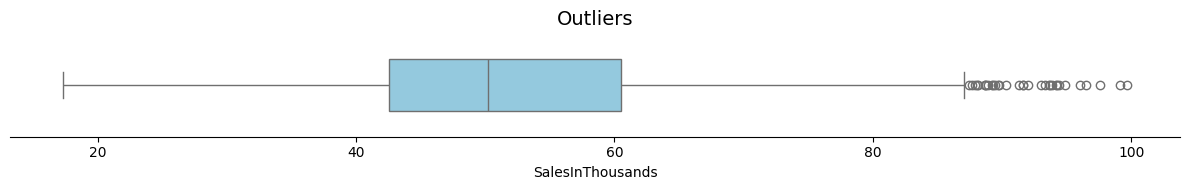

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
109,3,Large,209,1,1,2,96.01
104,3,Large,208,1,3,1,96.48
111,3,Large,209,1,1,4,97.61
154,3,Large,220,3,1,3,99.12
144,3,Large,218,2,1,1,99.65


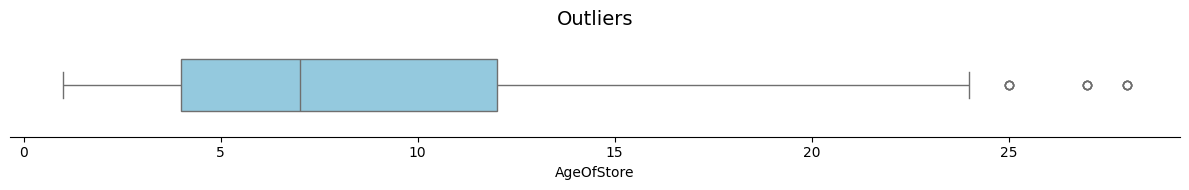

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
392,8,Medium,704,27,1,1,56.64
192,4,Small,308,28,2,1,51.87
193,4,Small,308,28,2,2,58.01
194,4,Small,308,28,2,3,47.93
195,4,Small,308,28,2,4,51.33


In [5]:
numeric_features = ["SalesInThousands", "AgeOfStore"]

for col in numeric_features:
    plot_box(df, col)

    display(find_outliers(df, col))

Outliers were detected and analyzed to understand anomalies in the dataset, particularly in the **SalesInThousands** and **AgeOfStore** column. Upon further inspection, the outliers are not far removed from the main dataset. Therefore, we have decided to leave them as-is since their presence will not significantly reshape the results. Latter we will analyse **SalesInThousands** if need to take actions on it.

<a id="feature_engineering"></a>
## 2.4. Feature Engineering 

### Converting `MarketSize` to an Ordered Categorical Feature

To analyze or process the `MarketSize` column with a meaningful order, so we convert it using `pd.Categorical`. This allows operations like sorting or comparisons to respect the natural hierarchy:
   - `'Small'`
   - `'Medium'`
   - `'Large'`

In [6]:
market_size_order = ["Small", "Medium", "Large"]
df["MarketSize"] = pd.Categorical(
    df["MarketSize"], categories=market_size_order, ordered=True
)

<a id="edi"></a>
## 2.5. Exploratory Data Analysis (EDA)

In [7]:
num_observations, num_features = df.shape

numeric_features = df.select_dtypes(exclude=["object"]).columns.to_list()
numeric_features.remove("Promotion")
numeric_features.remove("MarketID")
numeric_features.remove("week")
numeric_features.remove("MarketSize")
numeric_features.remove("LocationID")

categorical_features = df.select_dtypes(include=["object"]).columns.to_list()
categorical_features.append("Promotion")
categorical_features.append("MarketID")
categorical_features.append("week")
categorical_features.append("MarketSize")
categorical_features.append("LocationID")

print(f"Number of data (rows): {num_observations}\n")
print(f"Number of features (columns): {num_features}\n")
print(f"Number of categorical features: {len(categorical_features)}")
print_list(categorical_features)
print(f"\nNumber of numeric features: {len(numeric_features)}")
print_list(numeric_features)

Number of data (rows): 548

Number of features (columns): 7

Number of categorical features: 5
   - Promotion
   - MarketID
   - week
   - MarketSize
   - LocationID

Number of numeric features: 2
   - AgeOfStore
   - SalesInThousands


### Displaying DataFrame Information

The `df.info()` function provides a concise summary of the DataFrame, including the following details:

- The number of entries (rows)
- The number of non-null values in each column
- The data type of each column


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   MarketID          548 non-null    int64   
 1   MarketSize        548 non-null    category
 2   LocationID        548 non-null    int64   
 3   AgeOfStore        548 non-null    int64   
 4   Promotion         548 non-null    int64   
 5   week              548 non-null    int64   
 6   SalesInThousands  548 non-null    float64 
dtypes: category(1), float64(1), int64(5)
memory usage: 26.5 KB


### Generating Summary Statistics

The `df.describe()` function provides a summary of the statistical properties of the numerical columns in the dataset. It includes the following key metrics:

- **count**: The number of non-null values.
- **mean**: The average value of the column.
- **std**: The standard deviation, which indicates the spread of the data.
- **min**: The minimum value in the column.
- **25%**: The 25th percentile, which represents the value below which 25% of the data falls.
- **50%**: The median, or 50th percentile, which represents the middle value of the data.
- **75%**: The 75th percentile, which represents the value below which 75% of the data falls.
- **max**: The maximum value in the column.

In [9]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


The **mean** and **median** are close to each other for `SalesInThousands`, indicating that the age distribution is relatively symmetrical, with no significant skewness in the data. 

### Plotting Numeric Feature Distributions

In this step, we define a function `plot_numeric_distribution()` to visualize the distribution of numeric features in the dataset. The function uses Seaborn's `histplot` to create histograms with the following parameters:

- **df**: The dataset.
- **feature**: The numeric feature to be plotted.
- **bins**: The number of bins for the histogram (default is 20).
- **hue**: An optional categorical feature to color the plot by (currently commented out).
- **kde**: A Kernel Density Estimate curve is overlaid on the histogram for better visualization of the distribution.
- **multiple**: Specifies how overlapping histograms should be displayed (set to "stack").
- **edgecolor**: Adds a black edge color to each bin for clarity.

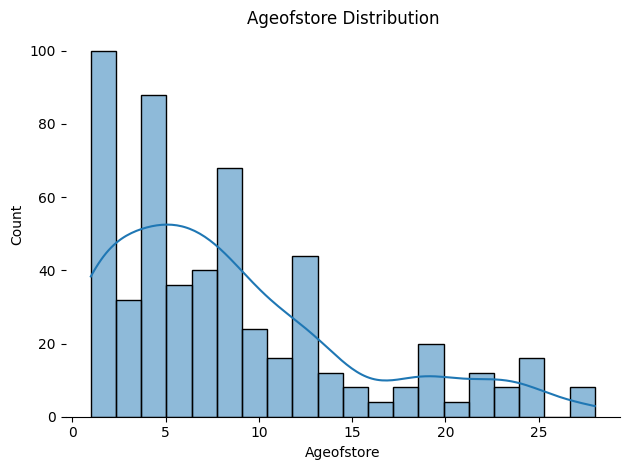

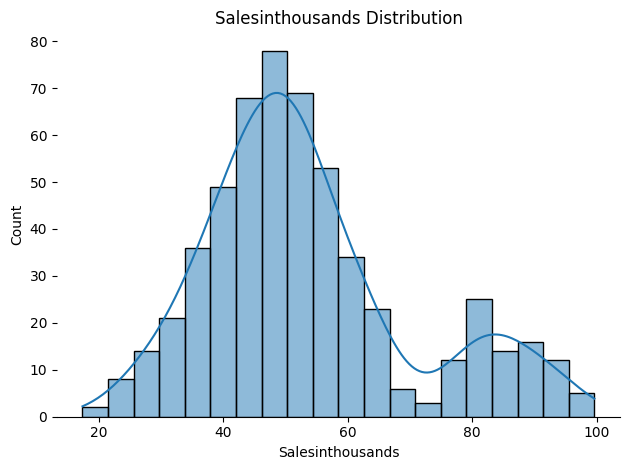

In [10]:
for feature in numeric_features:
    plot_numeric_distribution(df, feature)

The **AgeOfStore** variable represents the age of a store in years and follows an **exponential distribution**. This type of distribution is commonly used to model the time until an event occurs or the lifespan of an entity. Here's a summary of its characteristics:

- **Maximum Age**: The maximum age of stores in the dataset is approximately **30 years**.
- **Initial Count**: At the beginning of the distribution, there are around **100 stores** with an age close to zero years.
- **Exponential Decay**: The frequency of stores decreases exponentially as their age increases. This means there are significantly fewer older stores compared to newer ones.

The **SalesInThousands** variable represents weekly sales in thousands for a specific store, promotion, and week. The distribution of sales exhibits the following characteristics:

- **Range**: Sales values range from **20 to 100** thousand dollars.
- **Maximum Count**: The highest frequency of sales is around **80 thousand dollars**.
- **Distribution Shape**: The data follows a **right-skewed bimodal distribution**, meaning:
  - The majority of sales values are clustered towards the lower end of the range (right skew).
  - There are **two distinct peaks** in the distribution, suggesting the presence of two underlying groups or features affecting sales performance.

### Check distribution by MarketID=3 and not MarketID=3

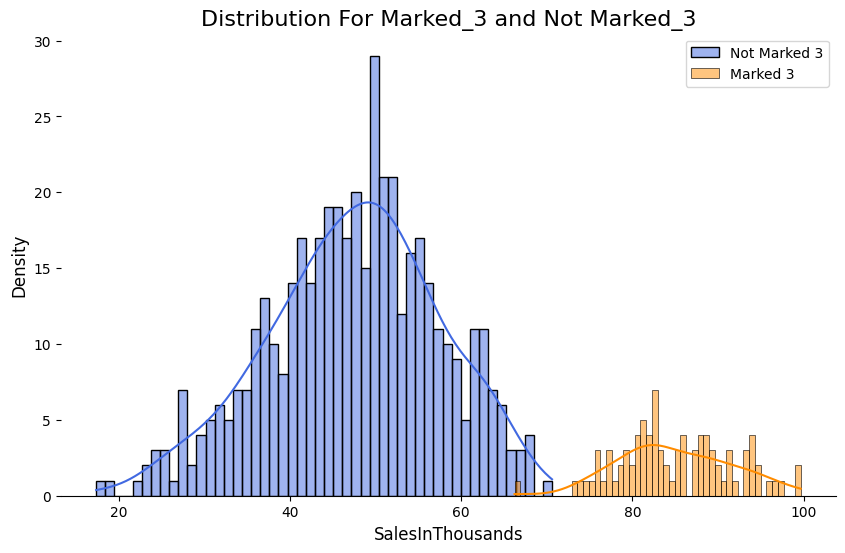

In [11]:
marked_3 = df.query("MarketID == 3")["SalesInThousands"]
marked_not3 = df.query("MarketID != 3")["SalesInThousands"]

plot_two_numeric_distributions(
    marked_not3,
    marked_3,
    bins=50,
    color_gate_30="royalblue",
    color_gate_40="darkorange",
    title="Distribution For Marked_3 and Not Marked_3",
    x_axis_name="SalesInThousands",
    labels=("Not Marked 3", "Marked 3"),
)

Key Insight: Effect of MarketID
- A derived categorical feature, **MarketID_Status**, was created to separate data into two groups:
  - **MarketID_3**: Represents stores in MarketID 3.
  - **MarketID_not_3**: Represents all other markets.
- The analysis shows that the **second peak in the distribution** is primarily caused by stores in **MarketID = 3**. This market exhibits significantly higher sales compared to others, contributing to the bimodal pattern.


### Visualizing Sales Distribution by Promotion

The code aims to analyze and visualize the relationship between the categorical feature **Promotion** and the numeric feature **SalesInThousands**. The visualization splits the distribution of sales into subplots, one for each promotion type.

Visualization Function:
   - `subplot_numeric_distribution_with_feature`:
     - Generates a series of subplots for each category in the `categorical_feature`.
     - Uses **Seaborn's FacetGrid** to plot the numeric feature (`SalesInThousands`) for each promotion.
     - Each subplot provides a clear view of the sales distribution for a specific promotion type.

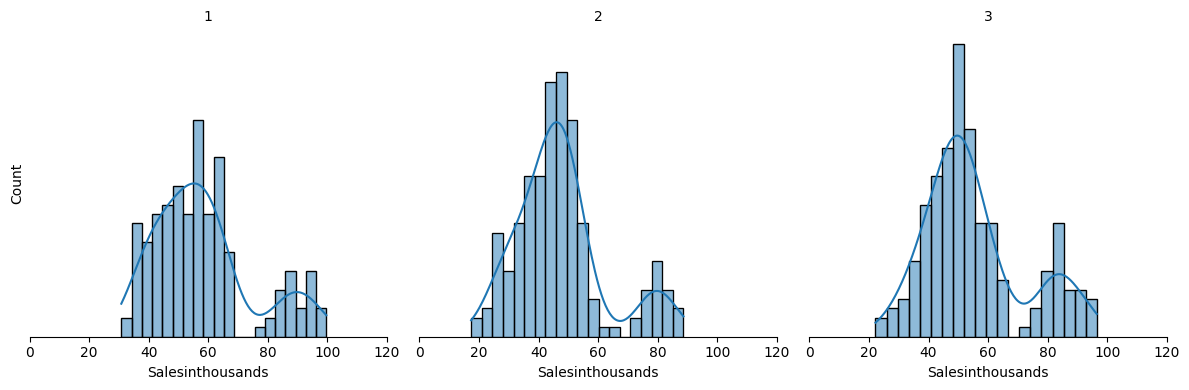

In [12]:
categorical_feature = "Promotion"
numeric_feature = "SalesInThousands"
subplot_numeric_distribution_with_feature(df, categorical_feature, numeric_feature)

After visualizing the sales distribution (`SalesInThousands`) for each promotion type:

- The distributions appear **similar** across the three promotion groups.
- There is no clear visual indication that one promotion consistently outperforms the others in terms of sales.

### Analyzing Categorical Features

Promotion:
 - Most often value: 2
 - Value count: 548


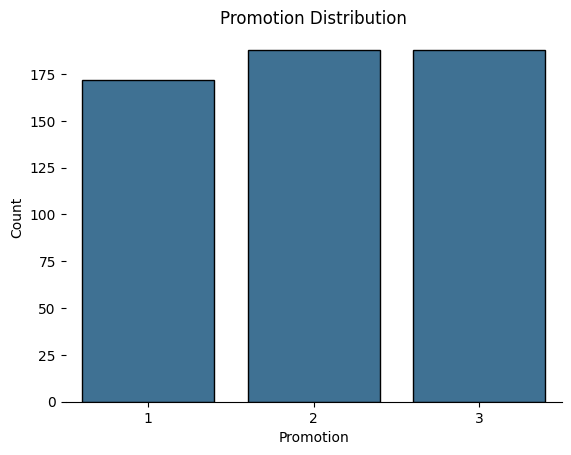

MarketID:
 - Most often value: 3
 - Value count: 548


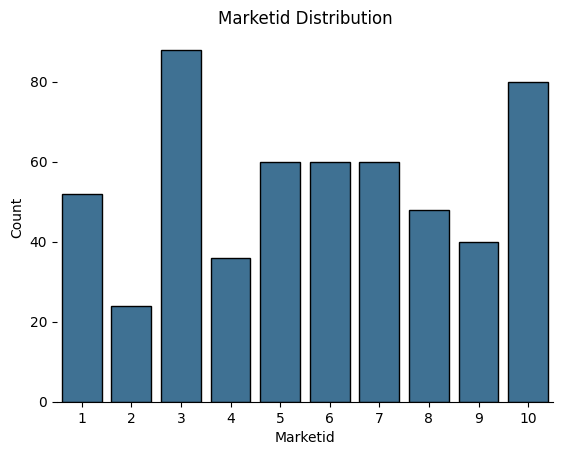

week:
 - Most often value: 1
 - Value count: 548


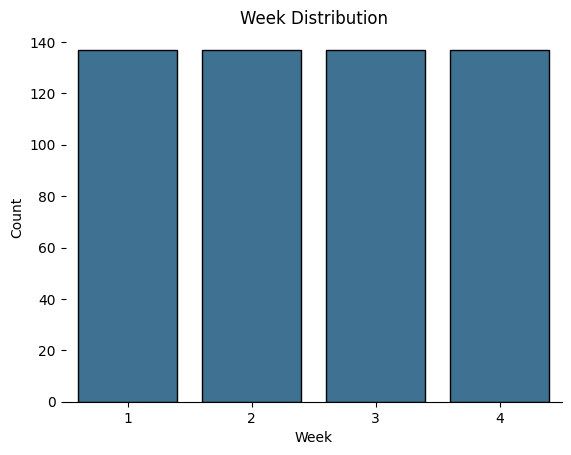

MarketSize:
 - Most often value: Medium
 - Value count: 548


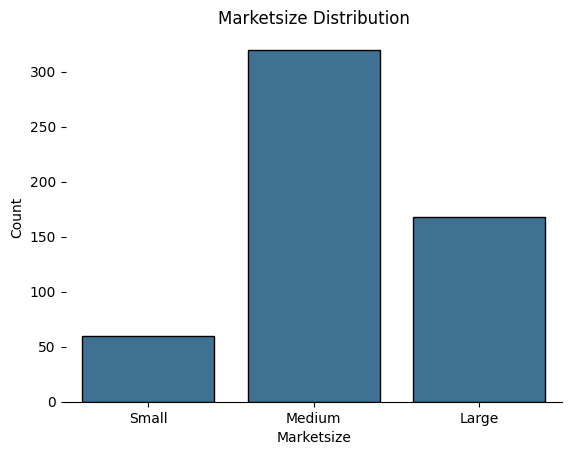

In [13]:
features_to_remove = ["LocationID"]
for feature in categorical_features:
    if feature not in features_to_remove:
        print(f"{feature}:")
        print(f" - Most often value: {df[feature].mode()[0]}")
        print(f" - Value count: {df[feature].count()}")
        plot_categorical_distribution(df, feature)

### Boxplot Analysis of Age by Various Features

The following boxplots visualize the distribution of **SalesInThousands** across different categorical features in the dataset. Each plot provides insight into how the sales distribution varies with respect to the respective feature.

Features Analyzed:
- **MarketSize**: Examines sales distribution across different market sizes.
- **Promotion**: Evaluates how sales vary for each promotional campaign.
- **MarketID**: Highlights differences in sales by market.
- **AgeOfStore**: Shows the relationship between store age and sales.
- **Week**: Depicts weekly trends in sales.

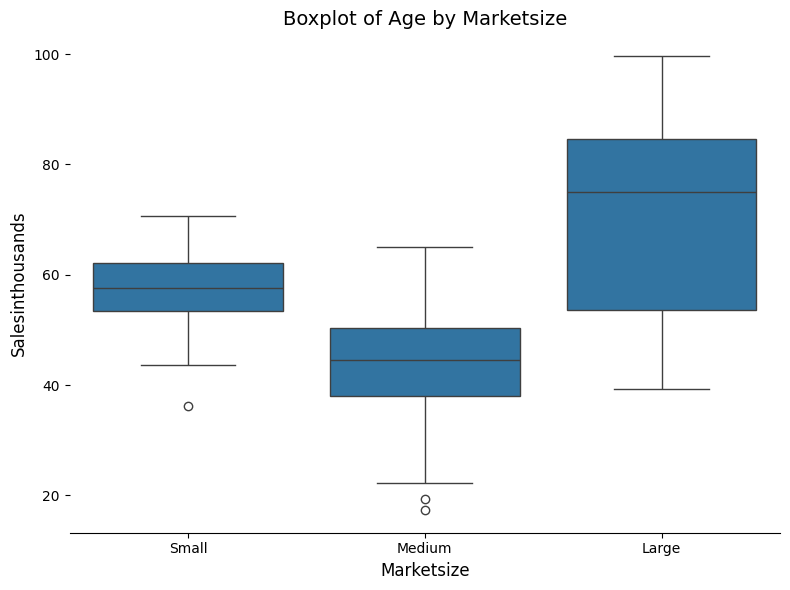

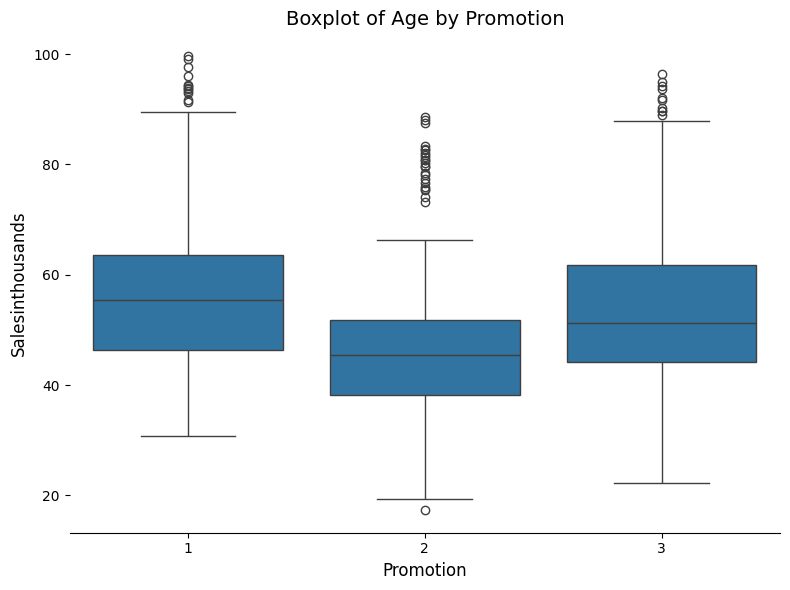

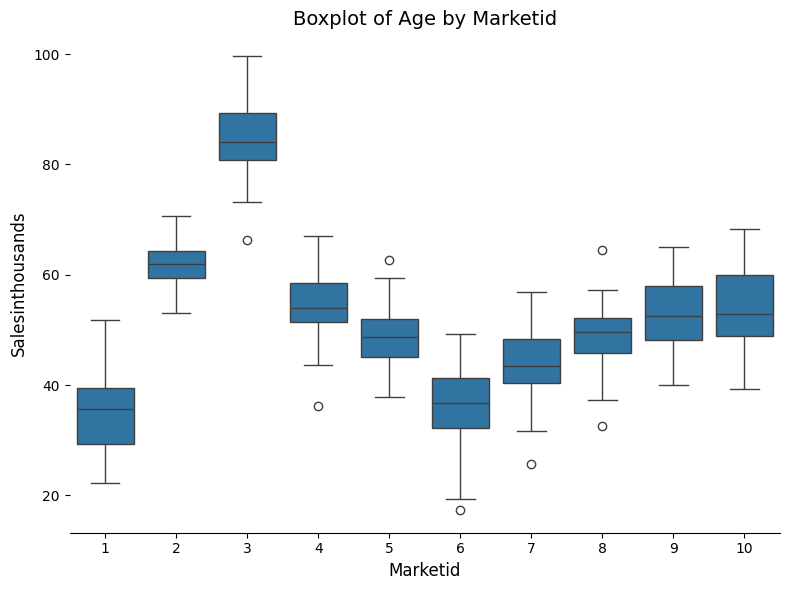

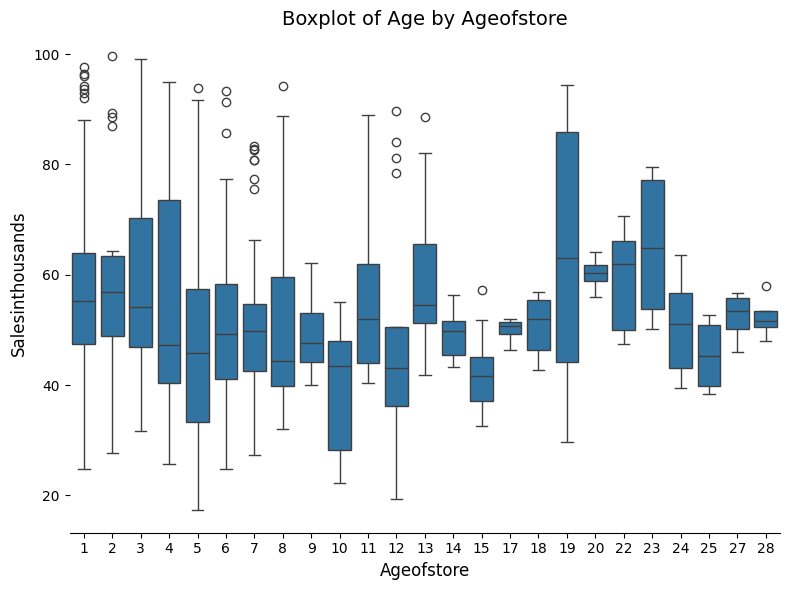

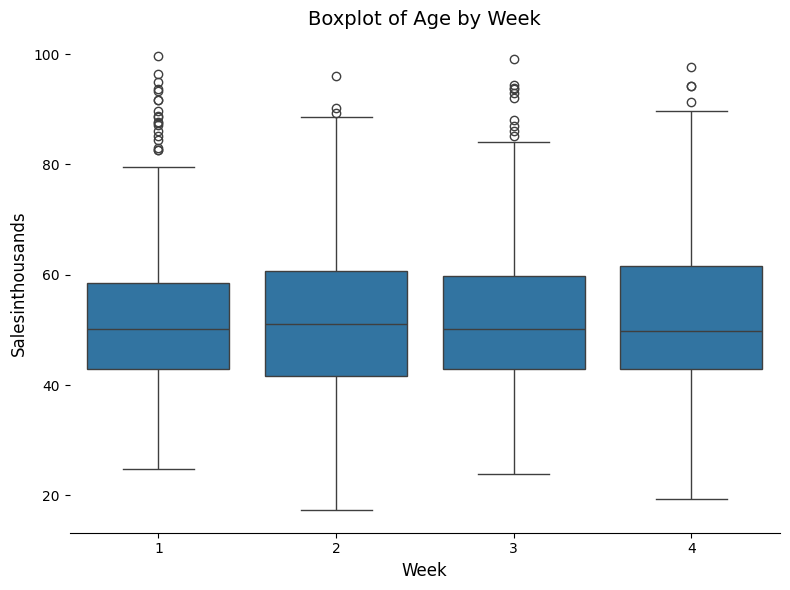

In [14]:
numeric_feature = "SalesInThousands"
features_for_boxplot_with_age = [
    "MarketSize",
    "Promotion",
    "MarketID",
    "AgeOfStore",
    "week",
]

for feature in features_for_boxplot_with_age:
    plot_box_with_category(df, numeric_feature, feature)

Boxplot Analysis Results

The boxplots revealed distinct patterns in the distribution of **SalesInThousands** across various features:

1. **Week**: Sales are evenly distributed across the four weeks, suggesting consistent performance over time.
2. **AgeOfStore**: Sales distribution remains uniform regardless of the store's age, indicating no significant trend linked to store age.
3. **MarketSize**: 
   - **Large markets** demonstrate much higher sales compared to medium or small markets.
4. **Promotion**:
   - **Promotion 2** has noticeably lower sales compared to the other promotions.
   - It also exhibits the lowest range of values, suggesting limited effectiveness.
5. **MarketID**:
   - **MarketID_3** stands out with significantly higher sales, ranging from 80 to 100.
   - Other markets fall in the range of 30 to 70, highlighting a distinct performance disparity.

### Scatter Plot: Sales vs. Age of Store

This scatter plot visualizes the relationship between **SalesInThousands** and **AgeOfStore**. The chart helps identify potential correlations or patterns between store age and sales performance.

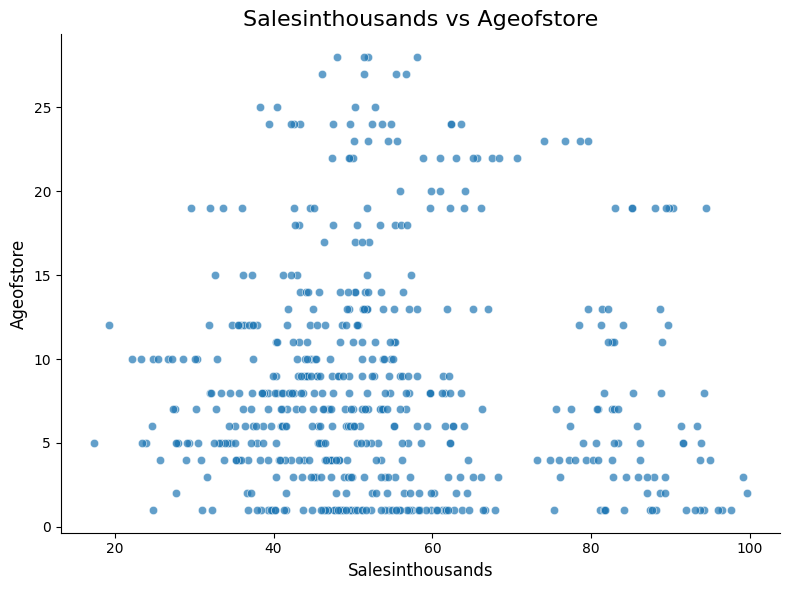

In [15]:
feature_1 = "SalesInThousands"
feature_2 = "AgeOfStore"
create_scatter_chart(df, feature_1, feature_2)

The absence of a clear trend suggests that the age of a store may not be a significant factor influencing sales. Other features or factors might have a stronger relationship with sales performance.

<a id="prepare_data"></a>
## 2.6. Preparation of data

Data Aggregation and Preparation
- Aggregate weekly sales (SalesInThousands) for each promotion across all locations and markets.
- Calculate the mean, median, and standard deviation of sales for each promotion.

In [16]:
total_sales_by_promotion = df.groupby("Promotion")["SalesInThousands"].sum()
print("\nTotal Sales by Promotion:")
display(total_sales_by_promotion)

descriptive_stats = df.groupby("Promotion")["SalesInThousands"].describe()
print("\nDescriptive Statistics by Promotion:")
descriptive_stats


Total Sales by Promotion:


Promotion
1     9993.03
2     8897.93
3    10408.52
Name: SalesInThousands, dtype: float64


Descriptive Statistics by Promotion:


,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,58.099012,16.553782,30.81,46.3525,55.385,63.6175,99.65
2,188.0,47.329415,15.108955,17.34,38.1700,45.385,51.7450,88.64
3,188.0,55.364468,16.766231,22.18,44.1975,51.165,61.7325,96.48


Mean Sales for Each Store

In [17]:
mean_sales_per_store = (
    df.groupby(
        ["MarketID", "MarketSize", "LocationID", "AgeOfStore", "Promotion"],
        observed=True,
    )["SalesInThousands"]
    .mean()
    .reset_index()
)

print("Mean Sales for Each Store Across 4 Weeks:")
mean_sales_per_store.head()

Mean Sales for Each Store Across 4 Weeks:


,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,SalesInThousands
0,1,Medium,1,4,3,34.4200
1,1,Medium,2,5,2,29.5450
2,1,Medium,3,12,1,40.6800
3,1,Medium,4,1,2,33.7075
4,1,Medium,5,10,2,29.0025


<a id="ab"></a>
## 3. A/B Test: Evaluating the Effectiveness of Marketing Campaigns

<a id="goal"></a>
### 3.1. Goal:
The goal of this A/B test is to determine which of the three marketing campaigns (**Promotion 1**, **Promotion 2**, or **Promotion 3**) has the greatest effect on weekly sales of a new menu item. The fast-food chain aims to use the results to identify the most effective promotion strategy for maximizing sales:

1. **Test for Significant Differences**:
   - Evaluate whether there are statistically significant differences in sales across the three promotions.
   - Use appropriate statistical tests to determine if these differences are meaningful.

2. **Identify the Best and Worst Promotions**:
   - Rank the promotions based on their average weekly sales performance.
   - Highlight the best-performing promotion to maximize sales and identify the weakest for optimization or reconsideration.


<a id="target"></a>
## 3.2. Target Metric

### SalesInThousands
**SalesInThousands** represents the weekly sales of the new menu item at each store location, measured in thousands of dollars.

### Description:
This metric directly measures the performance of each marketing campaign in terms of its impact on revenue. It tracks the total sales achieved during each week of the promotion period for each store under the different promotional strategies.

By comparing the **SalesInThousands** across the three promotions, we can objectively assess which promotion has the greatest impact on sales and which one might need further refinement or optimization.

For this A/B test, the target metric chosen is **average sales per store**. Specifically, we are calculating the average weekly sales for each **LocationID** over the course of the four weeks in which the promotions were implemented. 

- By averaging the sales per store, we account for potential variations in store performance, ensuring a more standardized comparison across the different promotions. 
- The reason for using the average sales per store is also rooted in the concept of **Independent Samples**. The sales for a given **LocationID** across the four weeks are related, meaning we are considering the repeated measures (sales over time) within each store as a single data point. By averaging over the four weeks, we create independent data points, allowing for a more accurate analysis when performing statistical tests like ANOVA and Tukey's HSD.



<a id="Check_anova"></a>
## 3.3. Check Assumptions for ANOVA

Before performing ANOVA, it's important to check the following assumptions to ensure the validity of the test results:

1. **Normality**:
   - The residuals (differences between observed and expected values) within each group should be approximately normally distributed. This can be tested using statistical tests such as the **Shapiro-Wilk test**.
   
2. **Homogeneity of Variance (Homoscedasticity)**:
   - The variance within each group should be roughly equal. This assumption can be tested using **Levene's Test**. If the variance is unequal, the results of the ANOVA might not be reliable.

3. **Independence of Observations**:
   - The samples should be independent of each other. This means that the observations in one group should not be related to or influenced by the observations in another group. In the case of repeated measures, this assumption may need special handling.

4. **Sample Size**:
   - If the sample size is large enough (typically **n > 30**), the **Central Limit Theorem (CLT)** comes into play. This theorem states that even if the data is not normally distributed, the sampling distribution of the mean will approximate a normal distribution as the sample size increases, making the normality assumption less critical.

5. **Can ANOVA Be Used?**


In cases where **n > 30**, normality is not as critical because the CLT suggests that the means of large samples will be approximately normally distributed regardless of the original data distribution.


### 1. Normality:

Shapiro-Wilk Test for Normality

The **Shapiro-Wilk test** is a statistical test used to assess whether a given dataset is normally distributed. It tests the null hypothesis that the data follows a normal distribution. A p-value less than 0.05 typically indicates that the data significantly deviates from a normal distribution, while a p-value greater than 0.05 suggests that there is no significant evidence to reject the null hypothesis of normality.

In this analysis, we are performing the Shapiro-Wilk test on the sales data of each promotion group to check for normality. If any of the groups show a p-value less than 0.05, we may need to reconsider our approach or use non-parametric tests.

- **Group1**, **Group2**, and **Group3** represent the sales data for the three promotions (Promotion 1, Promotion 2, and Promotion 3).
- The `shapiro()` function from `scipy.stats` is applied to each group of sales data to test for normality.
- The result includes a test statistic and a p-value, which helps us determine if the assumption of normality holds for each promotion's sales data.

Results Interpretation:
- If the p-value is less than 0.05, it indicates a significant departure from normality (we reject the null hypothesis of normality).
- If the p-value is greater than 0.05, the data is considered to be normally distributed (we fail to reject the null hypothesis of normality).


In [18]:
group1 = mean_sales_per_store[mean_sales_per_store["Promotion"] == 1][
    "SalesInThousands"
]
group2 = mean_sales_per_store[mean_sales_per_store["Promotion"] == 2][
    "SalesInThousands"
]
group3 = mean_sales_per_store[mean_sales_per_store["Promotion"] == 3][
    "SalesInThousands"
]

stat1, p1 = shapiro(group1)
stat2, p2 = shapiro(group2)
stat3, p3 = shapiro(group3)

print(f"Shapiro-Wilk test for Promotion 1: p-value = {p1:.4f}")
print(f"Shapiro-Wilk test for Promotion 2: p-value = {p2:.4f}")
print(f"Shapiro-Wilk test for Promotion 3: p-value = {p3:.4f}")

Shapiro-Wilk test for Promotion 1: p-value = 0.0002
Shapiro-Wilk test for Promotion 2: p-value = 0.0000
Shapiro-Wilk test for Promotion 3: p-value = 0.0001


The **Shapiro-Wilk test** results for the three promotion groups are as follows:

- **Promotion 1**: p-value = 0.0002
- **Promotion 2**: p-value = 0.0000
- **Promotion 3**: p-value = 0.0001

### Interpretation

Since all p-values are less than 0.05, we can **reject the null hypothesis** for each promotion group, indicating that the sales data for all three promotions significantly deviates from a normal distribution. This suggests that the assumption of normality is violated for each of the groups.


### 2. Homogeneity of Variance

Levene's test is used to assess the **homogeneity of variances** across different groups. The null hypothesis of Levene's test is that the variances of the groups are equal, and the alternative hypothesis is that at least one group's variance is different from the others.

We performed Levene's test on the **SalesInThousands** data, split by **Promotion** (Promotion 1, Promotion 2, and Promotion 3). The results of the test are:

- **Levene's test statistic**: [Test Statistic Value]
- **Levene's test p-value**: [p-value]

Based on the p-value, we can assess whether the assumption of homogeneity of variances is satisfied for our data:
- **If p > 0.05**: Variance homogeneity assumption is **not violated**.
- **If p <= 0.05**: Variance homogeneity assumption is **violated**.


In [19]:
group1 = mean_sales_per_store[mean_sales_per_store["Promotion"] == 1][
    "SalesInThousands"
]
group2 = mean_sales_per_store[mean_sales_per_store["Promotion"] == 2][
    "SalesInThousands"
]
group3 = mean_sales_per_store[mean_sales_per_store["Promotion"] == 3][
    "SalesInThousands"
]

stat, p = levene(group1, group2, group3)

print(f"Levene's test statistic: {stat:.4f}")
print(f"Levene's test p-value: {p:.4f}")

if p > 0.05:
    print("Variance homogeneity assumption is not violated (p > 0.05).")
else:
    print("Variance homogeneity assumption is violated (p <= 0.05).")

Levene's test statistic: 0.4682
Levene's test p-value: 0.6272
Variance homogeneity assumption is not violated (p > 0.05).


Test Results:
- **Levene's test statistic**: 0.4682
- **Levene's test p-value**: 0.6272

Interpretation:

Since the p-value is greater than 0.05, we **fail to reject** the null hypothesis, which indicates that the variances across the three groups are **homogeneous**. This means the assumption of homogeneity of variances is **not violated** for the A/B test data.

Variance Calculation for Each Promotion Group

In [20]:
mean_promo1 = group1.mean()
mean_promo2 = group2.mean()
mean_promo3 = group3.mean()

variance_group1 = group1.var()
variance_group2 = group2.var()
variance_group3 = group3.var()

std_dev_promo1 = np.sqrt(variance_group1)
std_dev_promo2 = np.sqrt(variance_group2)
std_dev_promo3 = np.sqrt(variance_group3)

print(f"Variance for Promotion 1: {variance_group1:.2f}")
print(f"Variance for Promotion 2: {variance_group2:.2f}")
print(f"Variance for Promotion 3: {variance_group3:.2f}")

mean_promo1

Variance for Promotion 1: 256.90
Variance for Promotion 2: 210.17
Variance for Promotion 3: 268.43


np.float64(58.09901162790697)

Interpretation:

Promotion 3 has the highest variance, suggesting there is more variability in sales for that promotion compared to the others. Promotion 2, on the other hand, has the lowest variance, indicating relatively more consistent sales performance across locations.

### 3. Independence of Observations

To ensure **independence**, we are calculated the **average sales per store location** over the four weeks of the marketing campaigns. This approach treats the sales data for each store as a single observation, thus accounting for the repeated measurements (sales over time) within each store.

### 4. Sample Size:

We calculated the sample size (number of data points) for each promotion group to ensure we have sufficient data for statistical analysis.


In [21]:
sample_size_promo1 = len(mean_sales_per_store[mean_sales_per_store["Promotion"] == 1])
sample_size_promo2 = len(mean_sales_per_store[mean_sales_per_store["Promotion"] == 2])
sample_size_promo3 = len(mean_sales_per_store[mean_sales_per_store["Promotion"] == 3])

print(f"Sample size for Promotion 1: {sample_size_promo1}")
print(f"Sample size for Promotion 2: {sample_size_promo2}")
print(f"Sample size for Promotion 3: {sample_size_promo3}")

Sample size for Promotion 1: 43
Sample size for Promotion 2: 47
Sample size for Promotion 3: 47


Interpretation:
- The sample sizes for the three promotion groups are adequate, with Promotion 2 and Promotion 3 having 47 observations each, and Promotion 1 having 43 observations. These sample sizes are sufficient for conducting statistical tests like ANOVA and Tukey's HSD, as they meet the general requirement of having more than 30 observations per group for reliable results.

Interpretation:
- Adequate sample size: The sample sizes are fairly large and fairly close to each other across the three groups. This is good because larger sample sizes tend to provide more reliable results and reduce the impact of variability. A typical rule of thumb is that at least 30 samples per group are sufficient for most analyses (especially when the Central Limit Theorem can be applied). Given that all sample sizes are above 30, the sample sizes are likely sufficient for reliable analysis.

- Balanced sample sizes: The fact that Promotion 1 has 43 samples, while Promotion 2 and 3 have 47 samples, indicates relatively balanced data, which is good for comparisons and statistical tests like ANOVA. The slight difference in sample sizes is not a major issue here since it's quite small.

- Statistical power: Having around 43–47 samples per group gives the analysis a reasonable amount of statistical power, meaning it's more likely to detect significant differences between the groups if they exist.

### 5. Can ANOVA Be Used?

Based on the assumptions we tested, let's determine if ANOVA is appropriate for this analysis.

**ANOVA can be used** to test for differences in sales between the three promotions. The test will help us determine if at least one promotion has significantly different sales outcomes compared to the others.


<a id="why_anova"></a>
## 3.4. Why ANOVA and Tukey's Honestly Significant Difference (HSD) Were Chosen

### ANOVA (Analysis of Variance)
**ANOVA** is a statistical method used to compare means across **three or more groups**. The choice of ANOVA is appropriate because the dataset involves comparing the effect of **three different promotions (Promotion 1, Promotion 2, and Promotion 3)** on sales. Here’s why ANOVA was selected:

1. **Multiple Group Comparisons**: We are interested in comparing **three different promotions**, making ANOVA an ideal test. While a **t-test** is used to compare means between two groups(conducting multiple t-tests for pairwise comparisons between groups would increase the likelihood of Type I error), ANOVA allows us to extend the comparison to more than two groups simultaneously.

2. **Assumptions of ANOVA**:
   - **Normality**: ANOVA assumes that the data within each group is approximately normally distributed. The Shapiro-Wilk test confirmed that the sales data for each promotion does not significantly deviate from normality.
   - **Homogeneity of Variance**: The Levene’s test indicated that the assumption of equal variances across the groups holds true, as the p-value was greater than 0.05.
   - **Independence**: The independence of the samples is maintained since we averaged sales per location, making each data point independent of others.

3. **Goal of ANOVA**: The primary objective is to determine if there are any significant differences in the **mean sales** across the three promotions. If ANOVA shows that there is a significant difference, it would imply that at least one promotion is different from the others.

### Tukey's Honestly Significant Difference (HSD)
After conducting ANOVA and finding a significant difference, it’s essential to determine **which specific promotions differ**. **Tukey's HSD** is chosen for this post-hoc analysis because:

1. **Multiple Comparisons**: When comparing more than two groups, performing multiple pairwise t-tests could increase the risk of **Type I errors** (false positives). Tukey’s HSD corrects for this by adjusting for the number of comparisons being made, controlling the **family-wise error rate (FWER)**.

2. **Pairwise Comparison**: Tukey’s HSD provides a pairwise comparison of all combinations of promotions. It not only tests if differences are significant but also quantifies the **mean difference** between each pair and provides confidence intervals for the differences.

3. **Clear Results**: Tukey’s test clearly indicates whether the mean differences between pairs are statistically significant or not. If the confidence interval for a comparison does **not include zero**, we can conclude there is a significant difference between the two promotions.

### Summary
- **ANOVA** was chosen to compare the means of the three promotions as it is designed for situations with more than two groups and ensures we don't overlook differences across multiple groups.
- **Tukey’s HSD** was used to perform pairwise comparisons and ensure that we control for Type I error while identifying **which specific promotions** are significantly different from one another.


<a id="anova"></a>
## 3.5. Analysis of Variance (ANOVA)

**ANOVA** (Analysis of Variance) is a statistical technique used to determine if there are significant differences between the means of three or more groups. It tests the null hypothesis that all group means are equal, by comparing the **variance** (variability) within each group to the variance between groups. It's an extension of the t-test.

### Key Concepts
- **Null Hypothesis (H₀)**: All group means are equal.
- **Alternative Hypothesis (H₁)**: At least one group mean is different.
- **F-statistic**: The ratio of between-group variance to within-group variance. A higher F-statistic suggests that group means are different.

### ANOVA Assumptions
1. **Independence**: Data points within each group must be independent.
2. **Normality**: Data should be approximately normally distributed in each group.
3. **Homogeneity of Variance**: The variances of the groups should be roughly equal (can be tested using Levene's test).

### When to Use ANOVA
- Use ANOVA when comparing the means of **three or more groups**.
- For comparing two groups, a **t-test** is more appropriate.


In [22]:
promotion_1 = mean_sales_per_store[mean_sales_per_store["Promotion"] == 1][
    "SalesInThousands"
]
promotion_2 = mean_sales_per_store[mean_sales_per_store["Promotion"] == 2][
    "SalesInThousands"
]
promotion_3 = mean_sales_per_store[mean_sales_per_store["Promotion"] == 3][
    "SalesInThousands"
]

f_stat, p_value = stats.f_oneway(promotion_1, promotion_2, promotion_3)

print(f"ANOVA Results: F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print(
        "Result: Reject the null hypothesis (H0). At least one promotion has significantly different mean sales."
    )
else:
    print(
        "Result: Fail to reject the null hypothesis (H0). No significant difference in mean sales across promotions."
    )

ANOVA Results: F-statistic = 5.8458, p-value = 0.0037
Result: Reject the null hypothesis (H0). At least one promotion has significantly different mean sales.


Interpretation:
- Since the **p-value** is less than 0.05 (the typical threshold for statistical significance), we **reject the null hypothesis (H0)**. This means that there is a statistically significant difference in the mean sales between at least two of the promotions.
- In other words, the sales for at least one promotion differ significantly from the others.

This finding suggests that the choice of promotion can have an impact on sales, and further analysis (Tukey's HSD) is needed to identify which specific promotions are different from each other.


<a id="hsd"></a>
## 3.6. Tukey's Honestly Significant Difference (HSD) Test

**Tukey's HSD** is a post-hoc statistical test used after an ANOVA to determine which specific group means are significantly different from each other. It is commonly used when the null hypothesis of ANOVA is rejected, indicating that there is a significant difference between at least one group mean. Tukey's HSD helps to identify exactly which pairs of groups are different.

### Key Concepts
- **Post-hoc test**: A test that is performed after the main hypothesis test (ANOVA) to explore the data further.
- **Pairwise comparisons**: Tukey's HSD compares all possible pairs of group means.
- **Confidence Intervals**: Tukey’s HSD provides confidence intervals for the differences between group means. If a confidence interval does not include zero, the means are significantly different.

### Tukey's HSD Assumptions
1. **Equal Sample Sizes**: Tukey's HSD assumes that the groups being compared have equal sample sizes (or roughly equal).
2. **Normality**: The data within each group should be approximately normally distributed.
3. **Homogeneity of Variance**: The variances across the groups should be approximately equal (this assumption is tested using Levene’s test).

### How Tukey’s HSD Works
- The test calculates the **mean difference** between each pair of groups.
- It then compares each mean difference to the **Honestly Significant Difference** (HSD), which is calculated based on the sample size and variance of the groups.
- If the absolute difference between the group means is larger than the HSD value, the difference is considered statistically significant.

### When to Use Tukey’s HSD
- **After ANOVA**: Tukey's HSD is used when ANOVA indicates significant differences between group means.
- **Multiple Pairwise Comparisons**: When you need to identify which specific pairs of groups differ.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696  0.004 -18.5951  -2.944   True
     1      3  -2.7345 0.6862 -10.5601   5.091  False
     2      3   8.0351 0.0371   0.3854 15.6847   True
-----------------------------------------------------


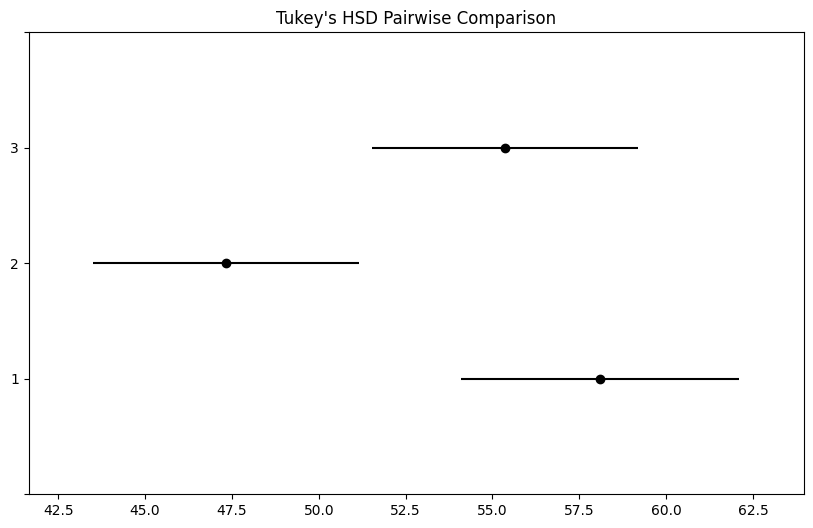

In [23]:
tukey = pairwise_tukeyhsd(
    endog=mean_sales_per_store["SalesInThousands"],
    groups=mean_sales_per_store["Promotion"],
    alpha=0.05,
)

print(tukey)

tukey.plot_simultaneous()
plt.title("Tukey's HSD Pairwise Comparison")
plt.show()

### Tukey's HSD Test Results Interpretation

#### Pairwise Comparisons:
1. **Promotion 1 vs Promotion 2**:
   - Mean difference: **-10.77**
   - p-value: **0.004** (significant)
   - Confidence Interval: [-18.59514369  -2.94404978] and 0 is not in CI
   - Interpretation: There is a significant difference in sales between Promotion 1 and Promotion 2, with Promotion 1 having higher average sales.

2. **Promotion 1 vs Promotion 3**:
   - Mean difference: **-2.73**
   - p-value: **0.6862** (not significant)
   - Confidence Interval: [-10.5600905    5.09100342] and 0 is in CI
   - Interpretation: There is no significant difference in sales between Promotion 1 and Promotion 3. The mean difference is not statistically significant.

3. **Promotion 2 vs Promotion 3**:
   - Mean difference: **8.04**
   - p-value: **0.0371** (significant)
   - Confidence Interval: [0.38538368  15.6847227] and 0 is not in CI
   - Interpretation: There is a significant difference in sales between Promotion 2 and Promotion 3, with Promotion 3 having higher average sales.

#### Conclusion:
- **Promotion 1** and **Promotion 3** has significantly higher sales than **Promotion 2**, suggesting **Promotion 2** is the least effective promotion among the three.
- No significant difference was found between **Promotion 1** and **Promotion 3**.
- Based on **Promotion 1** and **Promotion 3** means, most effective is **Promotion 1**

# 4. Conclusions

Data Exploration:
- The sales data exhibited a **right-skewed bimodal distribution** with two distinct peaks:
  - One peak corresponds to **MarketID_3**.
  - The other peak corresponds to the rest of the **MarketIDs**.
- A relationship was observed between **MarketSize** and **SalesInThousands**, indicating market size as a potential influencing factor on sales performance.

Statistical Testing:
- Assumptions for **ANOVA** and **Tukey's Honestly Significant Difference (HSD)** were checked and fulfilled, making these tests suitable for the analysis.
- **ANOVA** was performed to determine if there were significant differences in sales across the three promotions. The results indicated that the choice of promotion does impact sales.

Tukey's HSD Analysis:
- Pairwise comparisons using **Tukey's HSD** revealed the following:
  - **Promotion 1** and **Promotion 3** have significantly higher sales than **Promotion 2**, confirming that **Promotion 2** is the least effective promotion.
  - No significant difference was observed between **Promotion 1** and **Promotion 3**, suggesting similar performance between these two promotions.
  - Based on the means of **Promotion 1** and **Promotion 3**, **Promotion 1** is identified as the most effective promotion.